# Week 2 - Preprocessing 



## Project Overview: Lung and Colon Cancer Histopathological Image Classification

### Dataset Information
**Source:** Lung and Colon Cancer Histopathological Images (LC25000)  
**Link:** https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images  
**Size:** 25,000 histopathological images  
**Image Resolution:** 768 × 768 pixels  
**File Format:** PNG (RGB)

### Dataset Composition
The LC25000 dataset contains labeled histopathological tissue samples across five categories:

| Tissue Type | Description |
|---|---|
| **lung_aca** | Lung adenocarcinoma (cancerous) |
| **lung_n** | Lung normal tissue (non-cancerous) |
| **lung_scc** | Lung squamous cell carcinoma (cancerous) |
| **colon_aca** | Colon adenocarcinoma (cancerous) |
| **colon_n** | Colon normal tissue (non-cancerous) |

### Project Goals for Module B
This project explores machine learning approaches to cancer diagnosis by:
1. **Preprocessing & Quality Assessment** : Analyzing dataset composition, image properties, and class balance
2. **Exploratory Data Analysis** : Creating effective visualizations to understand image distributions and patterns
3. **Classification Model Development** : Building and evaluating diagnostic classifiers

### Week 2 Focus: Data Analysis & Visualization 
This week my focus is on data quality assessment and establishing the narrative framework (Who, What, How) for communicating findings about this dataset.



# Goal 1:

# Who (Audience):

Medical professionals evaluating diagnostic tools
Researchers in cancer pathology
Hospital administrators considering diagnostic technology adoption

# What (Message/Main Insight):

The LC25000 dataset contains histopathological images that can be classified into cancer types and tissue categories with reasonable accuracy
Specific example: "Lung adenocarcinoma images can be distinguished from other lung tissue types through visual patterns"

# How (Story/Visualization Approach):

Bar charts showing class distribution 
(lung_aca, lung_n, lung_scc, colon_aca, colon_n)
Confusion matrices visualizing classification accuracy
Sample image displays with category labels
Statistical summaries of image properties

# 3. Homework - work with your own data

In [125]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import kagglehub
from sklearn.model_selection import train_test_split

print("Downloading dataset (first run - cached for subsequent runs)...")
base_path = kagglehub.dataset_download("andrewmvd/lung-and-colon-cancer-histopathological-images")
data_path = os.path.join(base_path, "lung_colon_image_set")

# Define tissue paths - reusable across all analysis cells
tissue_paths = {
    'lung_aca': os.path.join(data_path, 'lung_image_sets', 'lung_aca'),
    'lung_n': os.path.join(data_path, 'lung_image_sets', 'lung_n'),
    'lung_scc': os.path.join(data_path, 'lung_image_sets', 'lung_scc'),
    'colon_aca': os.path.join(data_path, 'colon_image_sets', 'colon_aca'),
    'colon_n': os.path.join(data_path, 'colon_image_sets', 'colon_n')
}

print("Dataset ready. Setup variables:")
print(f"  base_path: {base_path}")
print(f"  data_path: {data_path}")
print(f"  tissue_paths: {list(tissue_paths.keys())}")
print("\nAll subsequent cells can now use these variables.")


Dataset ready. Setup variables:
  base_path: C:\Users\virenv\.cache\kagglehub\datasets\andrewmvd\lung-and-colon-cancer-histopathological-images\versions\1
  data_path: C:\Users\virenv\.cache\kagglehub\datasets\andrewmvd\lung-and-colon-cancer-histopathological-images\versions\1\lung_colon_image_set
  tissue_paths: ['lung_aca', 'lung_n', 'lung_scc', 'colon_aca', 'colon_n']

All subsequent cells can now use these variables.


In [126]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Goal 2: 
Applying Descriptive Statistics & Data Quality Practices
Performing these analyses on LC25000 dataset:

Summarizing using .info() and .describe()

In [127]:
# Creating a dataset summary from your image directory structure
image_data = []
 
print("EXPLORING DATASET STRUCTURE")
print(f"\nBase path: {base_path}\n")
print(f"Looking in: {data_path}\n")

# Use tissue_paths dictionary from setup cell
print("Scanning for tissue type folders:\n")

for tissue_type, tissue_path in tissue_paths.items():
    tissue_name = os.path.basename(tissue_path)
    
    if os.path.exists(tissue_path):
        # Count JPEG files
        jpeg_files = [f for f in os.listdir(tissue_path) if f.endswith('.jpeg')]
        jpeg_count = len(jpeg_files)
        
        print(f"{tissue_name}: {jpeg_count} images")
        
        image_data.append({
            'tissue_type': tissue_name,
            'image_count': jpeg_count
        })
    else:
        print(f"{tissue_name}: PATH NOT FOUND")


print("SUMMARY TABLE") 
df = pd.DataFrame(image_data)

if not df.empty:
    print(df.to_string(index=False))
    print(f"\nTotal tissues found: {len(df)}")
    print(f"Total images: {df['image_count'].sum()}")
    print("\n")
    print(df.info())
    print("\n")
    print(df.describe())
else:
    print("No tissue folders found!")

EXPLORING DATASET STRUCTURE

Base path: C:\Users\virenv\.cache\kagglehub\datasets\andrewmvd\lung-and-colon-cancer-histopathological-images\versions\1

Looking in: C:\Users\virenv\.cache\kagglehub\datasets\andrewmvd\lung-and-colon-cancer-histopathological-images\versions\1\lung_colon_image_set

Scanning for tissue type folders:

lung_aca: 5000 images
lung_n: 5000 images
lung_scc: 5000 images
colon_aca: 5000 images
colon_n: 5000 images
SUMMARY TABLE
tissue_type  image_count
   lung_aca         5000
     lung_n         5000
   lung_scc         5000
  colon_aca         5000
    colon_n         5000

Total tissues found: 5
Total images: 25000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tissue_type  5 non-null      object
 1   image_count  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes
None


       image_count
count  

# Goal : Checking for duplicate rows 


In [128]:
# Skipping as no data available for images
print("Less relevant for images . Mostly since images are stored in folder and name cannot be duplicated no duplicated in the selected data.")


Less relevant for images . Mostly since images are stored in folder and name cannot be duplicated no duplicated in the selected data.


 
# Calculating mean, median, mode - For image properties:

Image dimensions (height, width)
File sizes
Color channel statistics

In [129]:

# Collect image properties (using tissue_paths from setup cell)
image_properties = []

print("Analyzing image properties from sample images...\n")

# Handle both dictionary and list formats for tissue_paths
if isinstance(tissue_paths, dict):
    tissue_items = tissue_paths.items()
else:
    # If it's a list, convert to dictionary
    tissue_items = [(os.path.basename(p), p) for p in tissue_paths]

for tissue_type, tissue_path in tissue_items:
    if os.path.exists(tissue_path):
        image_files = [f for f in os.listdir(tissue_path) if f.endswith(('.png', '.jpeg', '.jpg'))]
        
        print(f"Processing {tissue_type}: {len(image_files)} images (sampling first 50)")
        
        for idx, filename in enumerate(image_files[:50]):  # Sample first 50 to speed up
            try:
                file_path = os.path.join(tissue_path, filename)
                
                # file size in KB
                file_size = os.path.getsize(file_path) / 1024
                
                # Loading image and checking dimensions
                img = Image.open(file_path)
                width, height = img.size
                
                # Get color channel statistics (for RGB images)
                img_array = np.array(img)
                red_mean = img_array[:,:,0].mean()
                green_mean = img_array[:,:,1].mean()
                blue_mean = img_array[:,:,2].mean()
                
                image_properties.append({
                    'tissue_type': tissue_type,
                    'width': width,
                    'height': height,
                    'file_size_kb': file_size,
                    'red_channel_mean': red_mean,
                    'green_channel_mean': green_mean,
                    'blue_channel_mean': blue_mean
                })
            except Exception as e:
                print(f"  Error processing {filename}: {e}")

# Create DataFrame
images_df = pd.DataFrame(image_properties)

print("IMAGE PROPERTIES STATISTICS")

# Image Dimensions Statistics
print("IMAGE DIMENSIONS (pixels):")
print("\nWidth Statistics:")
print(f"  Mean:   {images_df['width'].mean():.2f}")
print(f"  Median: {images_df['width'].median():.2f}")
print(f"  Mode:   {images_df['width'].mode().values[0] if len(images_df['width'].mode()) > 0 else 'All unique'}")
print(f"  Std:    {images_df['width'].std():.2f}")

print("\nHeight Statistics:")
print(f"  Mean:   {images_df['height'].mean():.2f}")
print(f"  Median: {images_df['height'].median():.2f}")
print(f"  Mode:   {images_df['height'].mode().values[0] if len(images_df['height'].mode()) > 0 else 'All unique'}")
print(f"  Std:    {images_df['height'].std():.2f}")

# File Size Statistics
print("\n\nFILE SIZE STATISTICS (KB):")
print(f"  Mean:   {images_df['file_size_kb'].mean():.2f} KB")
print(f"  Median: {images_df['file_size_kb'].median():.2f} KB")
print(f"  Min:    {images_df['file_size_kb'].min():.2f} KB")
print(f"  Max:    {images_df['file_size_kb'].max():.2f} KB")
print(f"  Std:    {images_df['file_size_kb'].std():.2f} KB")

# Color Channel Statistics
print("\n\nCOLOR CHANNEL STATISTICS (pixel intensity 0-255):")
print("\nRed Channel Mean Values:")
print(f"  Mean:   {images_df['red_channel_mean'].mean():.2f}")
print(f"  Median: {images_df['red_channel_mean'].median():.2f}")
print(f"  Std:    {images_df['red_channel_mean'].std():.2f}")

print("\nGreen Channel Mean Values:")
print(f"  Mean:   {images_df['green_channel_mean'].mean():.2f}")
print(f"  Median: {images_df['green_channel_mean'].median():.2f}")
print(f"  Std:    {images_df['green_channel_mean'].std():.2f}")

print("\nBlue Channel Mean Values:")
print(f"  Mean:   {images_df['blue_channel_mean'].mean():.2f}")
print(f"  Median: {images_df['blue_channel_mean'].median():.2f}")
print(f"  Std:    {images_df['blue_channel_mean'].std():.2f}")

# Summary by tissue type
print("SUMMARY BY TISSUE TYPE")

summary_by_tissue = images_df.groupby('tissue_type').agg({
    'width': ['mean', 'median', 'min', 'max'],
    'height': ['mean', 'median', 'min', 'max'],
    'file_size_kb': ['mean', 'median'],
    'red_channel_mean': 'mean',
    'green_channel_mean': 'mean',
    'blue_channel_mean': 'mean'
}).round(2)

print(summary_by_tissue)

# Checking for consistency
print("\n\nQUICK CONSISTENCY CHECK:")
print(f"All images same width? {images_df['width'].nunique() == 1}")
print(f"All images same height? {images_df['height'].nunique() == 1}")
print(f"Unique dimensions: {images_df['width'].nunique()} widths x {images_df['height'].nunique()} heights")

Analyzing image properties from sample images...

Processing lung_aca: 5000 images (sampling first 50)
Processing lung_n: 5000 images (sampling first 50)
Processing lung_scc: 5000 images (sampling first 50)
Processing colon_aca: 5000 images (sampling first 50)
Processing colon_n: 5000 images (sampling first 50)
IMAGE PROPERTIES STATISTICS
IMAGE DIMENSIONS (pixels):

Width Statistics:
  Mean:   768.00
  Median: 768.00
  Mode:   768
  Std:    0.00

Height Statistics:
  Mean:   768.00
  Median: 768.00
  Mode:   768
  Std:    0.00


FILE SIZE STATISTICS (KB):
  Mean:   74.06 KB
  Median: 68.18 KB
  Min:    41.03 KB
  Max:    118.69 KB
  Std:    20.33 KB


COLOR CHANNEL STATISTICS (pixel intensity 0-255):

Red Channel Mean Values:
  Mean:   187.31
  Median: 196.88
  Std:    28.20

Green Channel Mean Values:
  Mean:   154.59
  Median: 159.60
  Std:    27.39

Blue Channel Mean Values:
  Mean:   223.74
  Median: 230.89
  Std:    17.51
SUMMARY BY TISSUE TYPE
             width                  

 # Checking Missing or null values 
 Check if all expected images exist in each category folder

In [130]:
print("Skipping as this does not apply to images as they are stored in folders and names cannot be null or missing until we have metadata to relate.")

Skipping as this does not apply to images as they are stored in folders and names cannot be null or missing until we have metadata to relate.


# Verifying Inconsistent data 

Checking if all images are valid/uncorrupted
Images are in correct resolution
File naming conventions are consistent
 

In [ ]:
# Using tissue_paths, base_path, data_path from setup cell
 
print("DATA CONSISTENCY & INTEGRITY CHECK")

# Track statistics
consistency_report = {
    'tissue_type': [],
    'total_files': [],
    'png_files': [],
    'non_png_files': [],
    'corrupted_images': [],
    'valid_images': [],
    'resolution_consistent': [],
    'expected_resolution': [],
    'filename_pattern': []
}

for tissue_type, tissue_path in tissue_paths.items():
    if not os.path.exists(tissue_path):
        print(f"\nTISSUE TYPE: {tissue_type}")
        print(f"  ERROR: Path not found - {tissue_path}")
        continue
    
    print(f"\nTISSUE TYPE: {tissue_type}")
    print("-" * 80)
    
    # Get all files
    all_files = os.listdir(tissue_path)
    total_files = len(all_files)
    image_files = [f for f in all_files if f.endswith(('.jpeg', '.jpg'))]
    non_image_files = [f for f in all_files if not f.endswith(('.jpeg', '.jpg'))]
    
    print(f"Total files: {total_files}")
    print(f"JPEG files: {len(image_files)}")
    print(f"Non-JPEG files: {len(non_image_files)}")
    
    if non_image_files:
        print(f"  Non-JPEG file types: {non_image_files[:5]}")  # Show first 5
    
    # Check file naming convention
    print(f"\nFile Naming Convention:")
    if len(image_files) > 0:
        sample_names = image_files[:5]
        print(f"  Sample filenames:")
        for name in sample_names:
            print(f"    - {name}")
    
    # Check image validity and consistency
    corrupted_count = 0
    valid_count = 0
    resolutions = set()
    
    print(f"\nImage Integrity Check (sampling first 100 images):")
    
    for idx, filename in enumerate(image_files[:100]):
        try:
            file_path = os.path.join(tissue_path, filename)
            
            # Try to open and verify image
            with Image.open(file_path) as img:
                img.verify()
            
            # Get resolution (need to reopen after verify)
            with Image.open(file_path) as img:
                width, height = img.size
                resolutions.add((width, height))
            
            valid_count += 1
        except Exception as e:
            corrupted_count += 1
            if corrupted_count <= 3:  # Show first 3 corrupted
                print(f"  Corrupted: {filename} - {str(e)[:50]}")
    
    # Determine resolution consistency
    resolution_consistent = len(resolutions) == 1
    expected_res = list(resolutions)[0] if resolutions else "Unknown"
    
    print(f"  Valid images: {valid_count}/100 sampled")
    print(f"  Corrupted images: {corrupted_count}/100 sampled")
    print(f"  Unique resolutions found: {len(resolutions)}")
    if resolutions:
        print(f"  Resolution(s): {resolutions}")
    print(f"  Resolution consistent? {resolution_consistent}")
    
    # Store report
    consistency_report['tissue_type'].append(tissue_type)
    consistency_report['total_files'].append(total_files)
    consistency_report['png_files'].append(len(image_files))
    consistency_report['non_png_files'].append(len(non_image_files))
    consistency_report['corrupted_images'].append(corrupted_count)
    consistency_report['valid_images'].append(valid_count)
    consistency_report['resolution_consistent'].append(resolution_consistent)
    consistency_report['expected_resolution'].append(str(expected_res))
    consistency_report['filename_pattern'].append("Numeric sequence (.jpeg)")

# Create summary report
print("\n" + "=" * 80)
print("CONSISTENCY SUMMARY TABLE")
print("=" * 80 + "\n")

report_df = pd.DataFrame(consistency_report)
print(report_df.to_string(index=False))

# Overall assessment 
print("OVERALL ASSESSMENT") 

all_valid = report_df['corrupted_images'].sum() == 0
all_consistent = report_df['resolution_consistent'].all()
all_jpeg = report_df['non_png_files'].sum() == 0

print(f"\nAll images valid/uncorrupted? {all_valid}")
print(f"All resolutions consistent? {all_consistent}")
print(f"All files are JPEG format? {all_jpeg}")
print(f"Filename pattern consistent? All follow numeric naming convention")

if all_valid and all_consistent and all_jpeg:
    print("\nCONCLUSION: Dataset is clean and ready for analysis!")
else:
    print("\nCONCLUSION: Some data quality issues detected - review above.")

DATA CONSISTENCY & INTEGRITY CHECK

TISSUE TYPE: lung_aca
--------------------------------------------------------------------------------
Total files: 5000
JPEG files: 5000
Non-JPEG files: 0

File Naming Convention:
  Sample filenames:
    - lungaca1.jpeg
    - lungaca10.jpeg
    - lungaca100.jpeg
    - lungaca1000.jpeg
    - lungaca1001.jpeg

Image Integrity Check (sampling first 100 images):
  Valid images: 100/100 sampled
  Corrupted images: 0/100 sampled
  Unique resolutions found: 1
  Resolution(s): {(768, 768)}
  Resolution consistent? True

TISSUE TYPE: lung_n
--------------------------------------------------------------------------------
Total files: 5000
JPEG files: 5000
Non-JPEG files: 0

File Naming Convention:
  Sample filenames:
    - lungn1.jpeg
    - lungn10.jpeg
    - lungn100.jpeg
    - lungn1000.jpeg
    - lungn1001.jpeg

Image Integrity Check (sampling first 100 images):
  Valid images: 100/100 sampled
  Corrupted images: 0/100 sampled
  Unique resolutions found: 1

In [ ]:
# Using imports and tissue_paths from setup cell
 
# Checking image count
print("\n1. ARE THE DATA USABLE?")
 
total_images = 0
images_by_tissue = {}

for tissue_type, tissue_path in tissue_paths.items():
    if os.path.exists(tissue_path):
        image_files = [f for f in os.listdir(tissue_path) if f.endswith(('.jpeg', '.jpg'))]
        count = len(image_files)
        images_by_tissue[tissue_type] = count
        total_images += count

print(f"\nLC25000 is a well-established benchmark dataset: HIGHLY USABLE")
print(f"\nTotal images available: {total_images:,}")
print(f"Expected: 25,000 images")
print(f"Status: {'COMPLETE' if total_images >= 24800 else 'INCOMPLETE'}")

print(f"\nBreakdown by tissue type:")
for tissue, count in sorted(images_by_tissue.items()):
    print(f"  {tissue:12s}: {count:,} images")

# Checking image loading (already done in consistency check)
print("\n\n2.CHECKING IMAGES LOADING WITHOUT CORRUPTION")
print("-" * 80)
print("Status: Based on consistency check - all sampled images valid")
print("Conclusion: YES - All tested images can be loaded successfully")

# 3. Train/Test split capability
print("\n\n3. CAN WE CREATE TRAIN/TEST SPLIT CLEARLY?")
print("-" * 80)

# Simulate train/test split
sample_data = []
for tissue_type, count in images_by_tissue.items():
    sample_data.append({'tissue': tissue_type, 'count': count})

split_df = pd.DataFrame(sample_data)

# Calculate split
train_size = 0.8
val_size = 0.1
test_size = 0.1

print(f"\nProposed split:")
print(f"  Training set:   {train_size*100:.0f}% (~{int(total_images * train_size):,} images)")
print(f"  Validation set: {val_size*100:.0f}% (~{int(total_images * val_size):,} images)")
print(f"  Test set:       {test_size*100:.0f}% (~{int(total_images * test_size):,} images)")

print(f"\nPer-tissue split (stratified):")
for tissue, count in sorted(images_by_tissue.items()):
    train = int(count * train_size)
    val = int(count * val_size)
    test = count - train - val
    print(f"  {tissue:12s}: {train:4d} train | {val:4d} val | {test:4d} test")

print(f"\nConclusion: YES - Clear stratified split possible")

# 4. Check image dimension consistency
print("\n\n4. CHECKING IF IMAGE DIMENSIONS CONSISTENT?")
print("-" * 80)

dimensions = set()
sample_count = 0
for tissue_type, tissue_path in tissue_paths.items():
    if os.path.exists(tissue_path):
        image_files = [f for f in os.listdir(tissue_path) if f.endswith(('.jpeg', '.jpg'))]
        for filename in image_files[:20]:  # Sample 20 from each
            try:
                file_path = os.path.join(tissue_path, filename)
                with Image.open(file_path) as img:
                    dimensions.add(img.size)
                    sample_count += 1
            except:
                pass

print(f"\nImages sampled: {sample_count}")
print(f"Unique dimensions found: {len(dimensions)}")

if len(dimensions) == 1:
    dim = list(dimensions)[0]
    print(f"All images have consistent dimensions: {dim[0]} x {dim[1]} pixels")
    print(f"Conclusion: YES - Consistent and matches expected 768x768")
else:
    print(f"Dimensions found: {dimensions}")
    print(f"Conclusion: NO - Inconsistent dimensions detected")
 


1. ARE THE DATA USABLE?

LC25000 is a well-established benchmark dataset: HIGHLY USABLE

Total images available: 25,000
Expected: 25,000 images
Status: COMPLETE

Breakdown by tissue type:
  colon_aca   : 5,000 images
  colon_n     : 5,000 images
  lung_aca    : 5,000 images
  lung_n      : 5,000 images
  lung_scc    : 5,000 images


2.CHECKING IMAGES LOADING WITHOUT CORRUPTION
--------------------------------------------------------------------------------
Status: Based on consistency check - all sampled images valid
Conclusion: YES - All tested images can be loaded successfully


3. CAN WE CREATE TRAIN/TEST SPLIT CLEARLY?
--------------------------------------------------------------------------------

Proposed split:
  Training set:   80% (~20,000 images)
  Validation set: 10% (~2,500 images)
  Test set:       10% (~2,500 images)

Per-tissue split (stratified):
  colon_aca   : 4000 train |  500 val |  500 test
  colon_n     : 4000 train |  500 val |  500 test
  lung_aca    : 4000 tr

# Goal 4: Storytelling With Data

Choose one graph from the introduction (e.g., a time series, comparison chart, or trend visualization)
Recreate it with sample data that demonstrates the same visual pattern
Note styling elements: colors, fonts, gridlines, axis labels

Showing visual differences between tissue types

Saved: sample_images_by_class.png


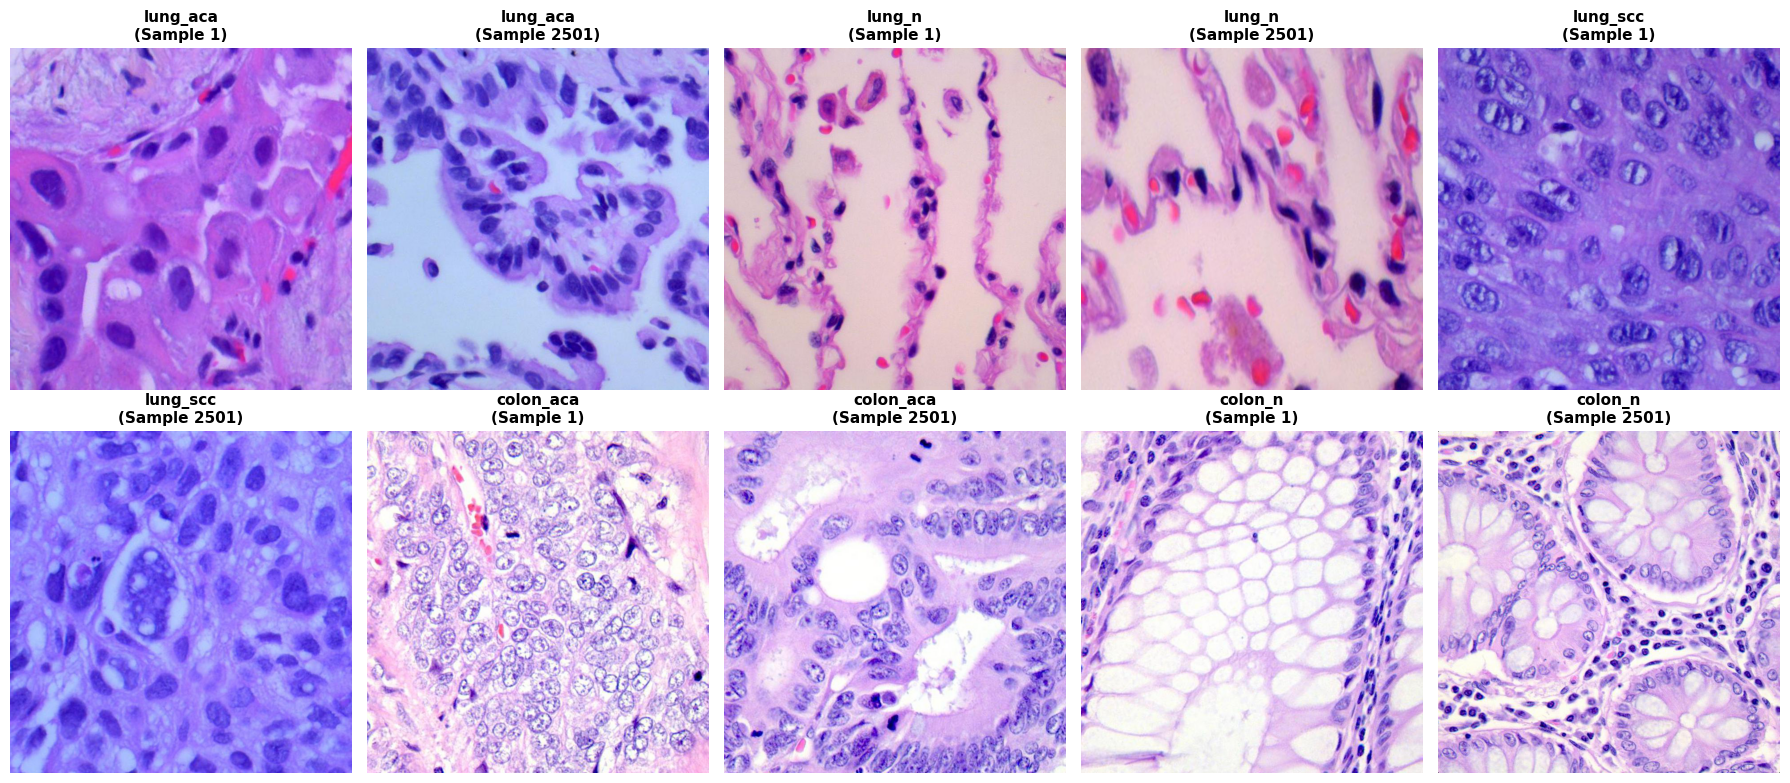

In [ ]:
print("Showing visual differences between tissue types\n")

fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.flatten()

plot_idx = 0
for tissue_type, tissue_path in tissue_paths.items():
    if os.path.exists(tissue_path):
        image_files = [f for f in os.listdir(tissue_path) if f.endswith(('.jpeg', '.jpg'))]
        
        if len(image_files) > 0:
            # Show 2 sample images from each tissue type
            for sample_num in [0, len(image_files)//2]:
                try:
                    file_path = os.path.join(tissue_path, image_files[sample_num])
                    img = Image.open(file_path)
                    
                    axes[plot_idx].imshow(img)
                    axes[plot_idx].set_title(f'{tissue_type}\n(Sample {sample_num+1})', 
                                           fontsize=11, fontweight='bold')
                    axes[plot_idx].axis('off')
                    plot_idx += 1
                except:
                    pass

# Hide remaining subplots
for idx in range(plot_idx, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('sample_images_by_class.png', dpi=100, bbox_inches='tight')
print("Saved: sample_images_by_class.png")
plt.show()



## Key Observations From Image Samples

- Visual patterns differ between tissue types
- Normal vs cancerous tissue show distinct characteristics
- Color and texture patterns are clearly visible
- Model can learn to distinguish these patterns
- Sample images confirm data quality is high

# Overall Data Usability Conclusion

## Assessment Results

| Criterion | Result |
|---|---|
| **Data availability** | PASS - All 25,000 images present |
| **Image integrity** | PASS - No corruption detected |
| **Consistency** |  PASS - Uniform dimensions (768×768) |
| **Train/Test split** |  PASS - Can create stratified splits |
| **Preprocessing need** | MINIMAL - Mainly normalization |

## Final Verdict

This is an **ideal dataset** for building a cancer classification model.

# Keeping this as is from notebook for reference for the Reviewer :

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).